In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# uniform 분포 주사위 분포
np.random.uniform(low=0.0, high=1.0)

0.8731176810398769

## Generate Dataset

In [3]:
x = np.random.uniform(low=0.0, high=1.0, size=100)
print(x.shape)

x[:10]

(100,)


array([ 0.86284255,  0.83862621,  0.5443087 ,  0.15268673,  0.33236392,
        0.8570202 ,  0.07092154,  0.19204573,  0.73372428,  0.18450536])

In [4]:
x1 = np.random.uniform(low=0.0, high=1.0, size=100)
print(x1.shape)

x1[:10]

(100,)


array([ 0.42787751,  0.97010189,  0.04801786,  0.50268836,  0.08229988,
        0.1386973 ,  0.34997605,  0.87052722,  0.54996296,  0.98108602])

In [5]:
x2 = np.random.uniform(low=0.0, high=1.0, size=100)
print(x2.shape)

x2[:10]

(100,)


array([ 0.11821357,  0.53303083,  0.95315903,  0.31861475,  0.85769167,
        0.60635732,  0.36737935,  0.38095924,  0.65981863,  0.8156721 ])

In [4]:
y = x * 0.3 + (np.random.uniform(low=0.0, high=1.0, size=100) * 0.01)
# + x2 * 0.5
# + 0.1 bias
print(y.shape)

y[:10]

(100,)


array([ 0.36815687,  0.35575304,  0.2688629 ,  0.14998335,  0.20166705,
        0.36545169,  0.12781575,  0.16334864,  0.32813406,  0.15622679])

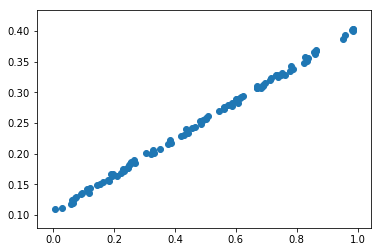

In [5]:
plt.scatter(x, y)

## y = wx

## Case 1 - Random Search

In [9]:
# num_epoch = 100

# best_error = np.inf
# best_w = None

# for epoch in range(num_epoch):
#     w = np.random.uniform(low=0.0, high=1.0)
#     y_predict = x * w
    
#     error = np.abs(y_predict - y).mean()
    
#     if error < best_error:
#         best_error = error
#         best_w = w
        
#         print("{0:2} w = {1:.5f} error = {2:.5f}".format(epoch, w, error))
    
# print("----" * 10)
# print("{0:2} w = {1:.5f} error = {2:.5f}".format(epoch, best_w, best_error))

In [24]:
num_epoch = 10000

best_error = np.inf
best_w1 = None
best_w2 = None
best_b = None

for epoch in range(num_epoch):
    w1 = np.random.uniform(low=0.0, high=1.0)
    w2 = np.random.uniform(low=0.0, high=1.0)
    b = np.random.uniform(low=0.0, high=1.0)
    
    y_predict = x1 * w1 + x2 * w2 + b
    
    error = np.abs(y_predict - y).mean()
    
    if error < best_error:
        best_error = error
        best_w1 = w1
        best_w2 = w2
        best_b = b
        
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, b = {3:.5f} error = {4:.5f}".format(epoch, w1, w2, b, error))
    
print("----" * 10)
print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, b = {3:.5f} error = {4:.5f}".format(epoch, best_w1, best_w2, best_b, best_error))

 0 w1 = 0.26351, w2 = 0.88314, b = 0.68613 error = 0.75437
 1 w1 = 0.12299, w2 = 0.48308, b = 0.69306 error = 0.48742
 2 w1 = 0.86456, w2 = 0.09342, b = 0.04478 error = 0.17809
 9 w1 = 0.18736, w2 = 0.94329, b = 0.05042 error = 0.13755
21 w1 = 0.19784, w2 = 0.92475, b = 0.05346 error = 0.13340
38 w1 = 0.16158, w2 = 0.37666, b = 0.30375 error = 0.06974
44 w1 = 0.29272, w2 = 0.31309, b = 0.15966 error = 0.05316
64 w1 = 0.37179, w2 = 0.48826, b = 0.04024 error = 0.03395
999 w1 = 0.23030, w2 = 0.59010, b = 0.07568 error = 0.03230
1235 w1 = 0.23395, w2 = 0.45086, b = 0.18357 error = 0.02489
1268 w1 = 0.26902, w2 = 0.55864, b = 0.08078 error = 0.01832
1656 w1 = 0.28167, w2 = 0.47395, b = 0.13523 error = 0.00953
----------------------------------------
9999 w1 = 0.28167, w2 = 0.47395, b = 0.13523 error = 0.00953


## Case 2 - h-step Search

In [137]:
num_epoch = 1000

w = np.random.uniform(low=0.0, high=1.0)
h = 0.01

for epoch in range(num_epoch):
    y_predict = x * w
    current_error = np.abs(y_predict - y).mean()
    
    y_predict = x * (w + h)
    h_plus_error = np.abs(y_predict - y).mean()
    if h_plus_error < current_error:
        w = w + h
        continue
        
    y_predict = x * (w - h)
    h_minus_error = np.abs(y_predict - y).mean()
    if h_minus_error < current_error:
        w = w - h
        continue
        
    break
    
print("{0:2} w = {1:.5f} error = {2:.5f}".format(epoch, w, current_error))

40 w = 0.30975 error = 0.00332


- w1, w2 집에서 짜보기

## Case 3 - Gradient Descent

In [37]:
# num_epoch = 100

# # w = np.random.uniform(low=0.0, high=1.0)
# w = -9999

# for epoch in range(num_epoch):
#     y_predict = x * w
    
#     error = np.abs(y_predict - y).mean()
#     if error < 0.005:
#         break
        
#     w = w - (y_predict - y).mean()
    
#     print("{0:2} w = {1:.5f}, error = {2:.5f}".format(epoch, w, error))

# print("-----" * 10)
# print("{0:2} w = {1:.5f}, error = {2:.5f}".format(epoch, w, error))

In [57]:
num_epoch = 1000
learning_rate = 1.2

# w1 = np.random.uniform(low=0.0, high=1.0)
# w2 = np.random.uniform(low=0.0, high=1.0)
# b = np.random.uniform(low=0.0, high=1.0)
w1 = -9999
w2 = -9999
b = -9999

for epoch in range(num_epoch):
    y_predict = x1 * w1 + x2 * w2 + b
#     y_predict = x1 * w1 + x2 * w2 + x3(1) * b
    
    error = np.abs(y_predict - y).mean()
    if error < 0.005:
        break
        
    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * ((y_predict - y)).mean()
    
    if epoch % 10 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, b = {3:.5f}, error = {4:.5f}".format(epoch, w1, w2, b, error))

print("-----" * 10)
print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, b = {3:.5f}, error = {4:.5f}".format(epoch, w1, w2, b, error))

 0 w1 = 3538.59639, w2 = 2951.13520, b = 14248.35511, error = 20206.12926
10 w1 = -88.91716, w2 = -505.27590, b = 4065.96122, error = 4224.84926
20 w1 = -484.83158, w2 = -756.27151, b = 1456.03498, error = 870.80876
30 w1 = -364.15864, w2 = -531.12343, b = 646.06739, error = 224.70759
40 w1 = -224.57811, w2 = -323.75296, b = 328.58250, error = 101.27193
50 w1 = -130.91473, w2 = -188.62607, b = 178.50774, error = 55.65032
60 w1 = -74.87400, w2 = -108.04314, b = 99.69510, error = 31.38389
70 w1 = -42.50557, w2 = -61.41145, b = 56.29891, error = 17.78398
80 w1 = -24.02659, w2 = -34.72718, b = 31.94256, error = 10.09246
90 w1 = -13.51701, w2 = -19.52407, b = 18.17111, error = 5.73097
100 w1 = -7.54673, w2 = -10.87749, b = 10.36262, error = 3.25504
110 w1 = -4.15608, w2 = -5.96346, b = 5.93044, error = 1.84890
120 w1 = -2.23051, w2 = -3.17161, b = 3.41368, error = 1.05027
130 w1 = -1.13693, w2 = -1.58567, b = 1.98434, error = 0.59666
140 w1 = -0.51584, w2 = -0.68482, b = 1.17253, error = 0.